In [4]:
f = open('AsianReligionsData/Complete_data .txt')
content = f.read()
lines = content.split("\n")
data = []

# wybranie tylko linii z danymi
for i in range(len(lines)):
    if i % 2 == 1:
        data.append(lines[i])

f.close()
data


['Â§ 1.The Buddha: "What do you think, Rahula: What is a mirror for?"The Buddha:Rahula: "For reflection, sir."Rahula:The Buddha: "In the same way, Rahula, bodily acts, verbal acts, & mental acts are to be done with repeated reflection.The Buddha:"Whenever you want to perform a bodily act, you should reflect on it: \'This bodily act I want to perform â€” would it lead to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?\' If, on reflection, you know that it would lead to self-affliction, to the affliction of others, or to both; it would be an unskillful bodily act with painful consequences, painful results, then any bodily act of that sort is absolutely unfit for you to do. But if on reflection you know that it would not cause affliction... it would be a skillful bodily act with happy consequences, happy results, then any bodily act of that sort is fit for you to do.(Similarly with verbal acts & mental a

In [16]:
import nltk
from nltk.probability import FreqDist

# najczestsze slowa

def tokenize(text):
    words = nltk.word_tokenize(text)
    return [word.lower() for word in words if word.isalpha()]

def word_frequency(words):
    return FreqDist(words)

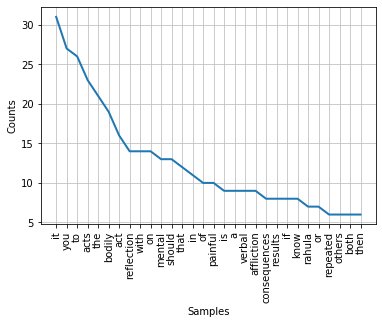

In [9]:
words = [tokenize(line) for line in data]
freq = [word_frequency(word_list) for word_list in words]
freq[0].plot(30, cumulative=False)

[nltk_data] Downloading package stopwords to /home/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


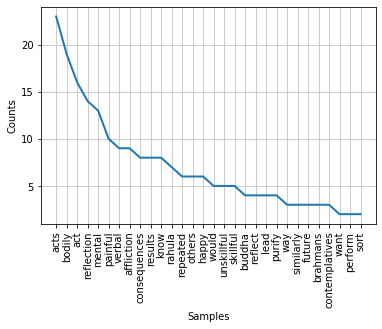

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# oczyszczenie ze stopwords
stop_words = set(stopwords.words("english"))

filtered_words = []
for word_list in words:
    filtered_words.append([word for word in word_list if word not in stop_words])

filtered_freq = [word_frequency(word_list) for word_list in filtered_words]
filtered_freq[0].plot(30, cumulative=False)

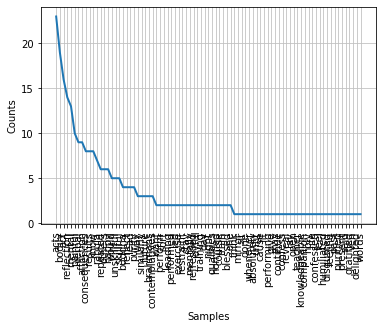

In [16]:
filtered_freq[0].plot(100, cumulative=False)

# Cały zbiór

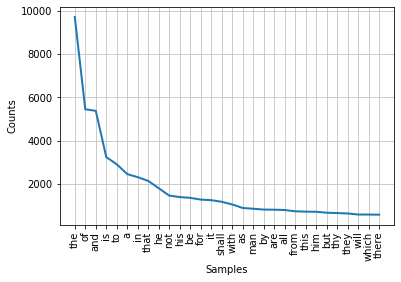

In [19]:
data_str = " ".join(data)
words_str = tokenize(data_str)
freq_str = word_frequency(words_str)
freq_str.plot(30, cumulative=False)

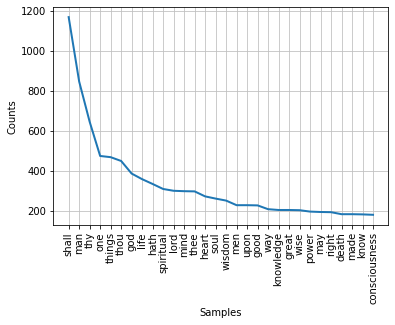

In [20]:
# zdecydowanie trzeba wycinac stopwords
filtered_words_str = [word for word in words_str if word not in stop_words]
filtered_freq_str = word_frequency(filtered_words_str)
filtered_freq_str.plot(30, cumulative=False)

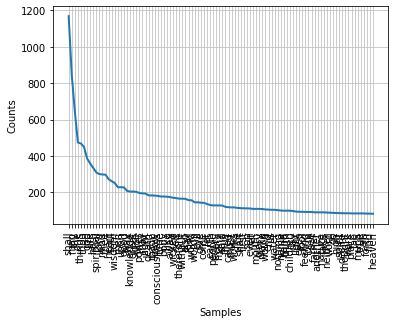

In [21]:
filtered_freq_str.plot(100, cumulative=False)

In [23]:
len(data) # liczba tekstow do analizy

590

In [5]:
import re
f = open('AsianReligionsData/labels.txt')
lcontent = f.read()
llines = lcontent.split("\n")
labels = []

# wybranie tylko linii z danymi
for l in llines:
    labels.append(l)
        
f.close()
labels.pop()
labels[0:5] + labels[-5:-1]

['Buddhism_Ch1',
 'Buddhism_Ch2',
 'Buddhism_Ch3',
 'Buddhism_Ch4',
 'Buddhism_Ch5',
 'BookOfWisdom_Ch15',
 'BookOfWisdom_Ch16',
 'BookOfWisdom_Ch17',
 'BookOfWisdom_Ch18']

# Z podziałem na księgi

## Obróbka

In [6]:
labels_general = []
for l in labels:
    labels_search = re.search('(.+)_', l)
    labels_general.append(labels_search.group(1))
groups = set(labels_general)
groups

{'BookOfEccleasiasticus',
 'BookOfEcclesiastes',
 'BookOfProverb',
 'BookOfWisdom',
 'Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra'}

In [8]:
group_ids = {}
for g in groups:
    tmp = [i for i in range(len(labels_general)) if labels_general[i] == g]
    group_ids[g] = tmp

In [9]:
group_ids['Buddhism'][0:5] + group_ids['Buddhism'][-5:-1]

[0, 1, 2, 3, 4, 41, 42, 43, 44]

In [10]:
import copy
books = {}
for g in groups:
    tmp = ""
    for i in group_ids[g]:
        tmp += data[i]
    books[g] = copy.copy(tmp)

In [11]:
books['Buddhism']

'Â§ 1.The Buddha: "What do you think, Rahula: What is a mirror for?"The Buddha:Rahula: "For reflection, sir."Rahula:The Buddha: "In the same way, Rahula, bodily acts, verbal acts, & mental acts are to be done with repeated reflection.The Buddha:"Whenever you want to perform a bodily act, you should reflect on it: \'This bodily act I want to perform â€” would it lead to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?\' If, on reflection, you know that it would lead to self-affliction, to the affliction of others, or to both; it would be an unskillful bodily act with painful consequences, painful results, then any bodily act of that sort is absolutely unfit for you to do. But if on reflection you know that it would not cause affliction... it would be a skillful bodily act with happy consequences, happy results, then any bodily act of that sort is fit for you to do.(Similarly with verbal acts & mental ac

In [12]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
# oczyszczenie ze stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\finwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Buddhism

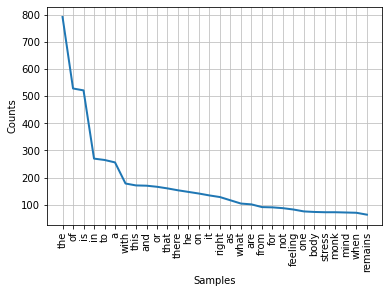

In [69]:
import matplotlib.pyplot as plt
buddhism_words_str = tokenize(books['Buddhism'])
buddhism_freq_str = word_frequency(buddhism_words_str)
buddhism_freq_str.plot(30, cumulative=False)

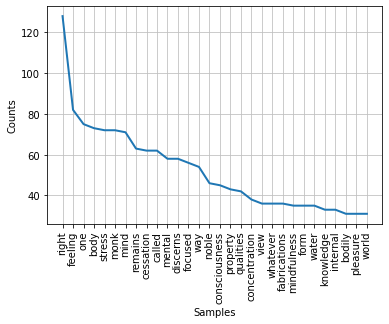

In [71]:
buddhism_filtered_words_str = [word for word in buddhism_words_str if word not in stop_words]
buddhism_filtered_freq_str = word_frequency(buddhism_filtered_words_str)
buddhism_filtered_freq_str.plot(30, cumulative=False)

## BookOfEccleasiasticus

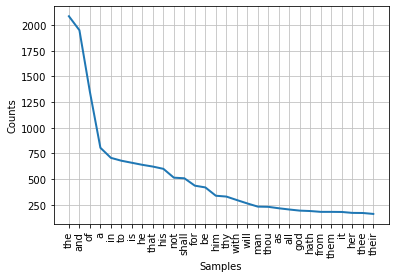

In [75]:
boe_words_str = tokenize(books['BookOfEccleasiasticus'])
boe_freq_str = word_frequency(boe_words_str)
boe_freq_str.plot(30, cumulative=False)

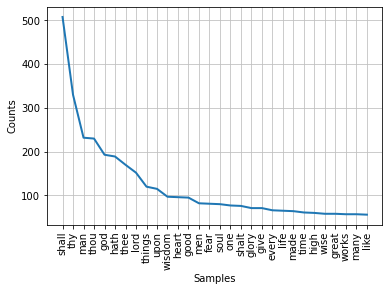

In [76]:
boe_filtered_words_str = [word for word in boe_words_str if word not in stop_words]
boe_filtered_freq_str = word_frequency(boe_filtered_words_str)
boe_filtered_freq_str.plot(30, cumulative=False)

## BookOfEcclesiastes

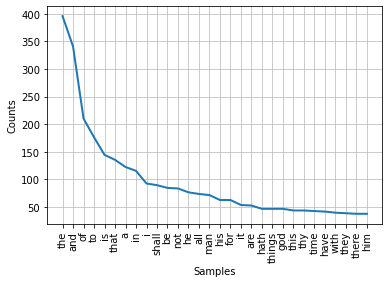

In [78]:
boe2_words_str = tokenize(books['BookOfEcclesiastes'])
boe2_freq_str = word_frequency(boe2_words_str)
boe2_freq_str.plot(30, cumulative=False)

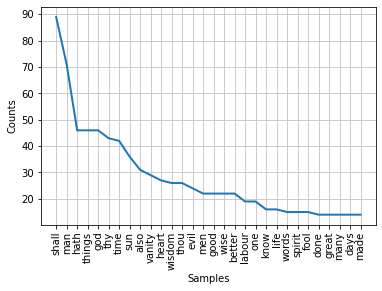

In [79]:
boe2_filtered_words_str = [word for word in boe2_words_str if word not in stop_words]
boe2_filtered_freq_str = word_frequency(boe2_filtered_words_str)
boe2_filtered_freq_str.plot(30, cumulative=False)

## BookOfProverb

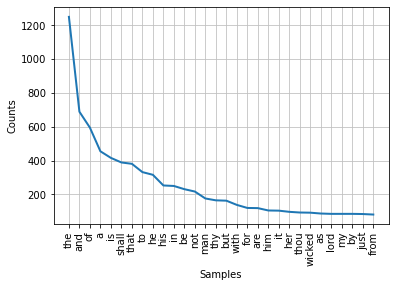

In [80]:
bop_words_str = tokenize(books['BookOfProverb'])
bop_freq_str = word_frequency(bop_words_str)
bop_freq_str.plot(30, cumulative=False)

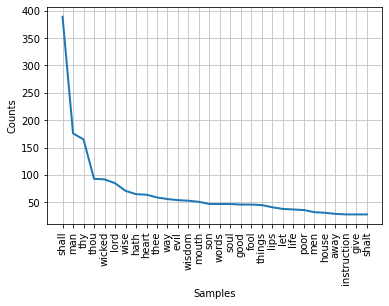

In [81]:
bop_filtered_words_str = [word for word in bop_words_str if word not in stop_words]
bop_filtered_freq_str = word_frequency(bop_filtered_words_str)
bop_filtered_freq_str.plot(30, cumulative=False)


## BookOfWisdom

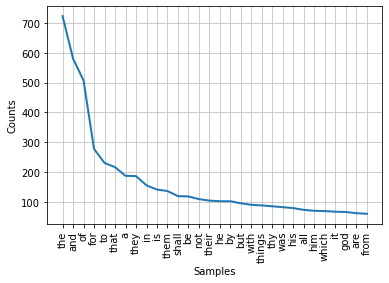

In [82]:
bow_words_str = tokenize(books['BookOfWisdom'])
bow_freq_str = word_frequency(bow_words_str)
bow_freq_str.plot(30, cumulative=False)

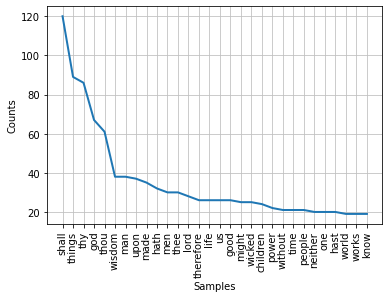

In [83]:
bow_filtered_words_str = [word for word in bow_words_str if word not in stop_words]
bow_filtered_freq_str = word_frequency(bow_filtered_words_str)
bow_filtered_freq_str.plot(30, cumulative=False)

## TaoTeChing

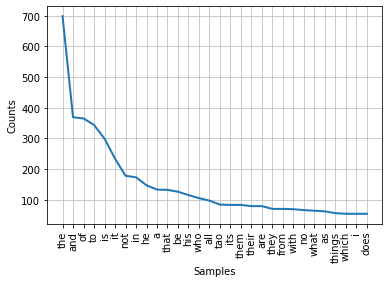

In [84]:
ttc_words_str = tokenize(books['TaoTeChing'])
ttc_freq_str = word_frequency(ttc_words_str)
ttc_freq_str.plot(30, cumulative=False)

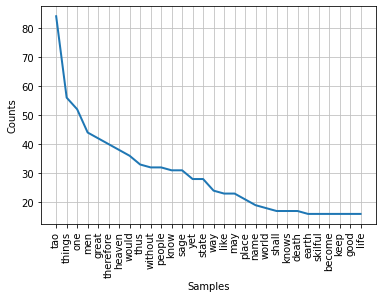

In [86]:
ttc_filtered_words_str = [word for word in ttc_words_str if word not in stop_words]
ttc_filtered_freq_str = word_frequency(ttc_filtered_words_str)
ttc_filtered_freq_str.plot(30, cumulative=False)

## Upanishad

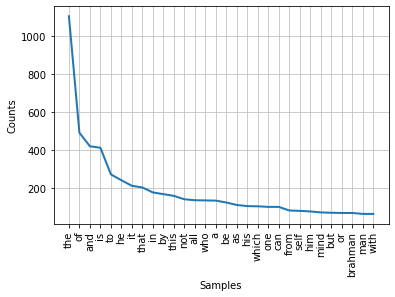

In [87]:
Upanishad_words_str = tokenize(books['Upanishad'])
Upanishad_freq_str = word_frequency(Upanishad_words_str)
Upanishad_freq_str.plot(30, cumulative=False)

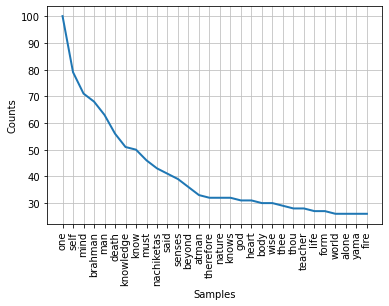

In [89]:
Upanishad_filtered_words_str = [word for word in Upanishad_words_str if word not in stop_words]
Upanishad_filtered_freq_str = word_frequency(Upanishad_filtered_words_str)
Upanishad_filtered_freq_str.plot(30, cumulative=False)

## YogaSutra

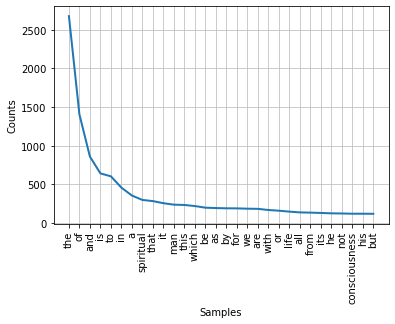

In [90]:
ys_words_str = tokenize(books['YogaSutra'])
ys_freq_str = word_frequency(ys_words_str)
ys_freq_str.plot(30, cumulative=False)

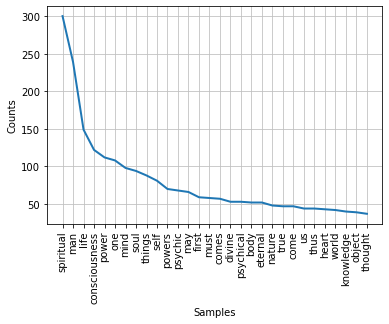

In [91]:
ys_filtered_words_str = [word for word in ys_words_str if word not in stop_words]
ys_filtered_freq_str = word_frequency(ys_filtered_words_str)
ys_filtered_freq_str.plot(30, cumulative=False)

# Klasyfikacja sentymentów

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer


def text_emotion(tekst):
    filepath = ('AsianReligionsData/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    document = word_tokenize(tekst)
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=range(0, len(document)), columns=emotions)
    for i in range(0, len(document)):
        word = document[i]
        emo_score = emolex_words[emolex_words.word == word]
        if not emo_score.empty:
            for emotion in list(emotions):
                emo_df.at[i, emotion] += emo_score[emotion]

    return emo_df


## Buddhism

In [188]:
buddhism_emo = text_emotion(books['Buddhism'])

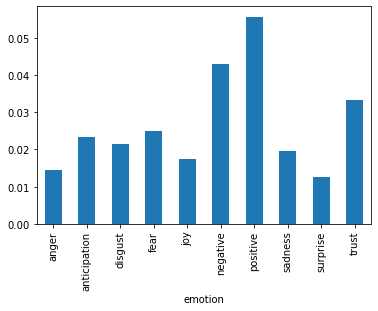

In [189]:
buddhism_emo = buddhism_emo.sum()/buddhism_emo.shape[0]
buddhism_emo.plot.bar()

## BookOfEccleasiasticus

In [192]:
boe_emo = text_emotion(books['BookOfEccleasiasticus'])

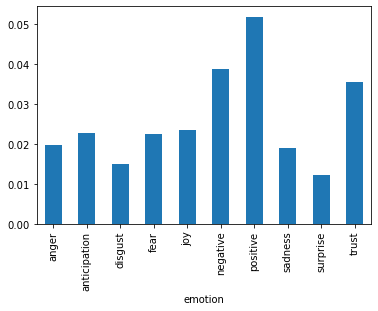

In [194]:
boe_emo = boe_emo.sum()/boe_emo.shape[0]
boe_emo.plot.bar()

## BookOfEcclesiastes

In [169]:
boe2_emo = text_emotion(books['BookOfEcclesiastes'])

In [176]:
boe2_emo = boe2_emo.sum()/boe2_emo.shape[0]

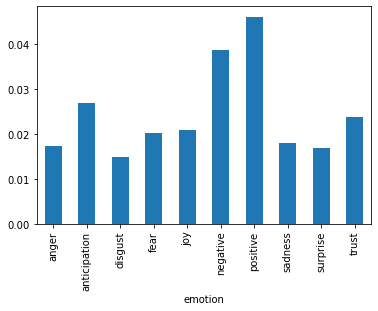

In [195]:
boe2_emo.plot.bar()

## BookOfProverb

In [170]:
bop_emo = text_emotion(books['BookOfProverb'])

In [177]:
bop_emo = bop_emo.sum()/bop_emo.shape[0]

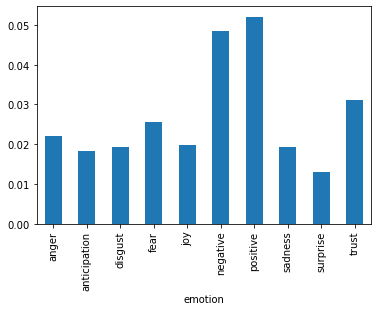

In [196]:
bop_emo.plot.bar()

## BookOfWisdom

In [13]:
bow_emo = text_emotion(books['BookOfWisdom'])

In [15]:
bow_emo = bow_emo.sum()/bow_emo.shape[0]

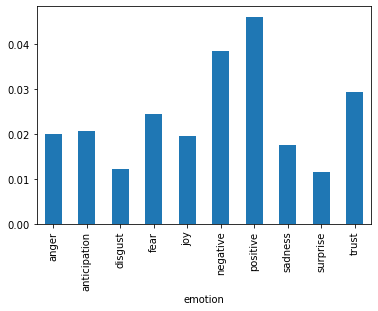

In [17]:
bow_emo.plot.bar()

## TaoTeChing

In [19]:
ttc_emo = text_emotion(books['TaoTeChing'])

In [20]:
ttc_emo = ttc_emo.sum()/ttc_emo.shape[0]

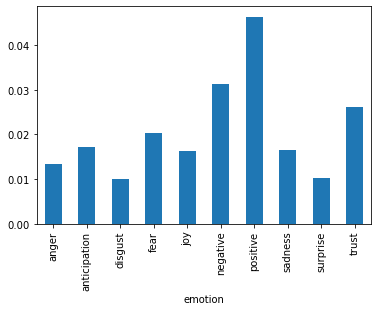

In [21]:
ttc_emo.plot.bar()

## Upanishad

In [22]:
Upanishad_emo = text_emotion(books['Upanishad'])

In [23]:
Upanishad_emo = Upanishad_emo.sum()/Upanishad_emo.shape[0]

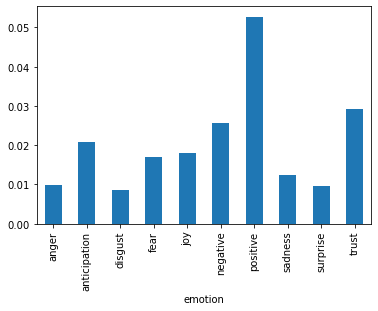

In [24]:
Upanishad_emo.plot.bar()

## YogaSutra

In [181]:
ys_emo = text_emotion(books['YogaSutra'])

In [182]:
ys_emo = ys_emo.sum()/ys_emo.shape[0]

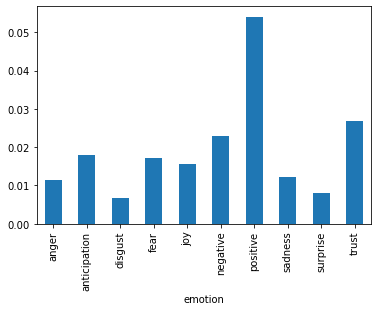

In [185]:
ys_emo.plot.bar()